# 5 函数和代码复用
## 5.1 函数的定义与使用
> 理解与定义；使用及调用过程；参数传递；返回值；局部变量和全局变量；lambda函数；
## 5.2 实例7：七段数码管绘制
## 5.3 代码复用与函数递归
## 5.4 模块4：PyInstaller库的使用
## 5.5 实例8：科赫雪花小包裹


## 5.1 函数的定义与使用
### 5.1.1 函数定义
具有特殊功能的、可重用的语句组...
代码表示：     
``
def <函数名>(<参数(0个或多个)>):
    <函数体>
    return <返回值>
``    
### 5.1.2 函数使用和调用过程     
定义不被执行，调用以实际参数代替形式参数获得运算结果；     

### 5.1.3 函数参数传递     
1. 函数可有参数也可没有，但必须保留括号；   
2. 可选参数必须放在非可选参数后面，用逗号隔开；    
3. 可变参数：不确定参数总数量；    
``
def <函数名> (<参数>, *b ):   
    <函数体>
    return <返回值>
``    
### 5.1.4 函数返回值     
可返回0个或多个结果；    
用小括号，中间用逗号隔开的为：元组类型；用方括号的为：列表类型；    

### 5.1.5 局部变量和全局变量     
1. 规则1：局部变量和全局变量是不同变量；局部变量是函数内部的占位符，与全局变量可能重名但不同；函数运算结束后，局部变量被释放；使用`global`在局部中定义全局变量；       
2. 规则2：局部变量为组合数据类型且未创建，等同于全局变量

3. 使用规则：基本数据类型，无论是否重名，局部变量与全局变量不同

### 5.1.6 lambda函数
lambda函数返回函数作为结果：是一种匿名函数（没有名字的函数）；使用lambda保留字定义，函数名是返回结果；用于定义简单的、能够在一行内表示的函数；    
`<函数名> = lambda <参数>:<表达式>`    
等价于：
``
def <函数名>(<参数>):
    <函数体>
    return <返回值>
``    
E.g：
`f = lambda x, y : x + y`
`f(10, 25)`结果为：25；    
`f = lambda : "lambda函数" `     
`print(f())`结果为：lambda函数；   


In [1]:
# 5.1.5V1.py
ls = ["F","f"]    #通过使用[]真实创建了一个全局变量列表ls，（列表为组合数据类型）
def func(a):
    ls.append(a)  #在ls中增加一个元素，此时ls是列表类型，未真实创建则等同于全局变量
    return
func("C")         #全局变量ls被修改
print(ls)

['F', 'f', 'C']


In [2]:
# 5.1.5V2.py       #如果一个组合类型在函数中被真实创建，那它就是这个函数的局部变量
ls = ["F","f"]     #通过使用[]真实创建了一个全局变量列表ls
def func(a):
    ls = []        #此处ls是列表类型，真实创建ls是局部变量
    ls.append(a)
    return
func("C")          #局部变量ls被修改
print(ls)

['F', 'f']


## 5.2 七段数码管绘制


基本思路：
1. 绘制单个数字对应的数码管；    
2. 获得一串数字，绘制对应的数码管；    
3. 获取当前系统时间，绘制对应的数码管；    

步骤：     
1. 七段数码管由7个基本线条组成；可以有固定顺序；显示不同的线条；
2. 获取一段数字，绘制多个数码管；    
3. 获取当前时间，以使用数码管显示时间；     

In [17]:
# NixieTube.py
import turtle, time
def drawGap():
    turtle.penup()
    turtle.fd(5)
def drawLine(draw):      #绘制单段数码管
    drawGap()
    turtle.pendown() if draw else turtle.penup()    #如果draw为真值则画，如果不是则抬起画笔移动
    turtle.fd(40)     #向该方向行进40像素
    drawGap()
    turtle.right(90)  #转向90度
def drawDigit(digit):    #根据数字绘制七段数码管
    drawLine(True) if digit in [2,3,4,5,6,8,9] else drawLine(False)
    drawLine(True) if digit in [0,1,3,4,5,6,7,8,9] else drawLine(False)
    drawLine(True) if digit in [0,2,3,5,6,8,9] else drawLine(False)
    drawLine(True) if digit in [0,2,6,8] else drawLine(False)
    turtle.left(90)
    drawLine(True) if digit in [0,4,5,6,8,9] else drawLine(False)
    drawLine(True) if digit in [0,2,3,5,6,7,8,9] else drawLine(False)
    drawLine(True) if digit in [0,1,2,3,4,7,8,9] else drawLine(False)
    turtle.left(180)
    turtle.penup()    #为绘制后续数字确定位置
    turtle.fd(20)     #...
def drawDate(date):   #获得要输出的数字，日期格式为：'%Y-%m=%d+'
    turtle.pencolor("red")
    for i in date:
        if i == '-':
            turtle.write('年',font=("Arial",18,"normal"))
            turtle.pencolor("green")
            turtle.fd(40)
        elif i == '=':
            turtle.write('月',font=("Arial",18,"normal"))
            turtle.pencolor("blue")
            turtle.fd(40)
        elif i == '+':
            turtle.write('日',font=("Arial",18,"normal"))
        else:
            drawDigit(eval(i))   #通过eval()函数将数字变为整数
def main():
    turtle.setup(800, 350, 200, 200)     #设置画布大小
    turtle.penup()        
    turtle.fd(-300)      #当前画笔初始绘制所在位置
    turtle.pensize(5)
    drawDate(time.strftime('%Y-%m=%d+',time.gmtime()))   #调用函数
    turtle.hideturtle()
    turtle.done()
main()

## 5.3 代码复用与函数递归
> 代码复用与模块化设计；函数递归的理解；函数递归的调用过程；函数递归实例解析；

### 5.3.1 代码复用
资源化、抽象化、复用；   
函数：将代码命名，在代码层面建立初步抽象；对象：属性和方法，在函数之上再次组织进行抽象；   

### 5.3.2 函数递归（类似数学归纳法）    
1. 两个关键特征：1) 链条：计算过程中存在的递归链条；2) 基例：存在一个或多个不需要再次递归的基例；     
2. 函数和分支语句；    
3. 字符串反转：    
    * 将字符串s反转后输出：`s[::-1]`：切片操作，对于字符串s从最开始到最后采用-1的步长进行输出；  
      用递归实现反转：   
``
        def rvs(s):
        if s == "":
            return s
        else:
            return rvs(s[1:])+s[0]
``    
    * 斐波那契数列：$F(n) = F(n-1) + F(n-2)$     
``
    def f(n):
        if n == 1 or n == 2:
            return 1
        else:
            return f(n-1) + f(n-2)
``    
    * 汉诺塔问题：      
``
    count = 0
    def hanoi(n,src,dst,mid):
        global count
        if n == 1:
            print("{}:{}->{}".format(1,src,dst))
            count += 1
        else:
            hanoi(n-1, src, mid, dst)
            print("{}:{}->{}".format(n, src, dst))
            count += 1
            hanoi(n-1, mid, dst, src)
``    


In [18]:
# 5.3.2.py
def fact(n):
    if n == 0:
        return 1
    else:
        return n*fact(n-1)
fact(5)

120

In [33]:
# 5.3.2.py  汉诺塔问题
count = 0
def hanoi(n,src,dst,mid):
    global count
    if n == 1:
        print("{}:{}->{}".format(1,src,dst))
        count += 1
    else:
        hanoi(n-1,src,mid,dst)
        print("{}:{}->{}".format(n,src,dst))
        count += 1
        hanoi(n-1,mid,dst,src)
hanoi(3,"A","C","B")
print(count)

1:A->C
2:A->B
1:C->B
3:A->C
1:B->A
2:B->C
1:A->C
7


## 5.4 模块4：PyInstaller库的使用    
> 将.py源代码转换成无需源代码的可执行文件（exe文件、Linux、Mac OS X）；   
### 5.4.1 安装
安装：`pip install pyinstaller`；
### 5.4.2 使用
（cmd命令行）：`pyinstaller -F <文件名.py>`：会生成多个文件夹，在生成的dist文件夹里面会有同名的exe文件；   

| 参数 | 描述 |
|:----:|:----:|
| -h   | 查看帮助 |
| --clean | 清理打包过程中的临时文件 |
| -D, --onedir | 默认值，生成dist文件夹 |
| -F, --onefile | 在dist文件夹中只生成独立的打包文件 |
| -i<图标文件名.ico> | 指定打包程序使用的图标(icon)文件 |

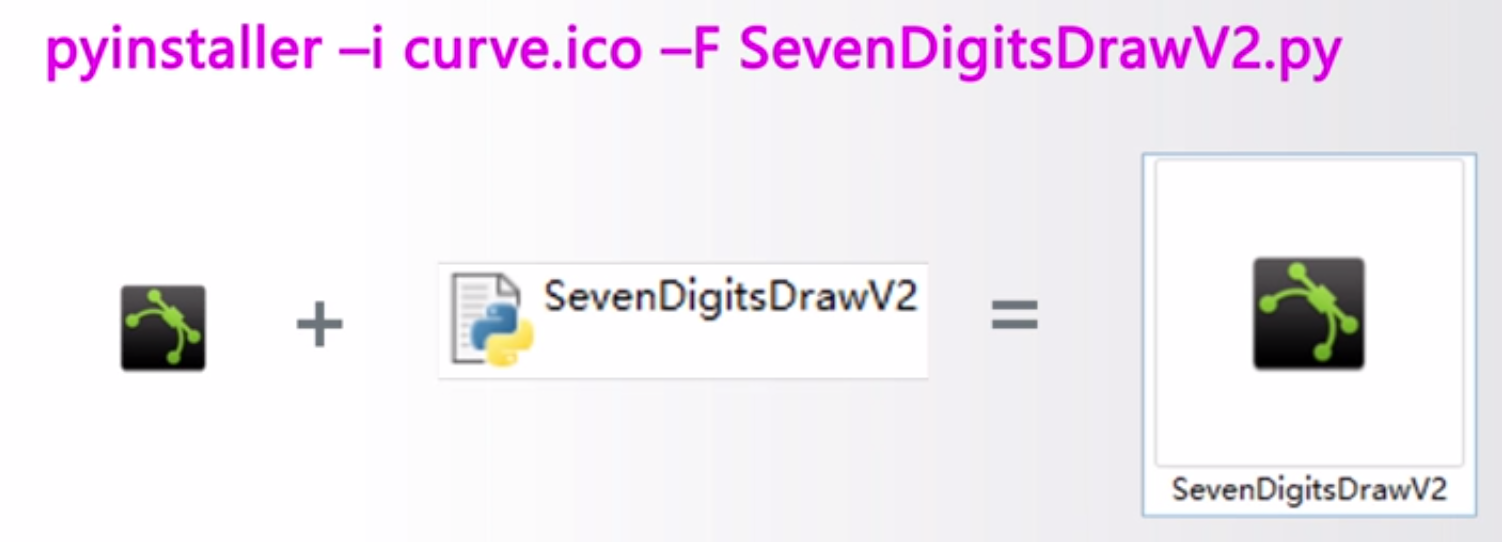



## 5.5 科赫雪花小包裹
科赫曲线（雪花曲线）；

In [1]:
# KochDrawV1.py
import turtle
def koch(size, n):
    if n == 0:
        turtle.fd(size)
    else:
        for angle in [0, 60, -120, 60]:
            turtle.left(angle)
            koch(size/3, n-1)
def main():
    turtle.setup(600, 600)
    turtle.penup()
    turtle.goto(-200, 100)
    turtle.pendown()
    turtle.pensize(2)
    level = 3       #3阶科赫曲线，阶数
    koch(400, level)
    turtle.right(120)
    koch(400, level)
    turtle.right(120)
    koch(400, level)
    turtle.hideturtle()
main()
